# Esperienza 4
## Misura dell'aberrazione sferica di una lente convergente sottile

In [1]:
import numpy as np
import pandas as pd
import xarray as xr

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
graph_default_size = (6,3)
graph_default_dpi = 200
graph_base_name = './grafici/graph_'

style = ['white', 'dark', 'whitegrid', 'darkgrid', 'ticks'][2]
sns.set_style(style)

In [3]:
style = ['white', 'dark', 'whitegrid', 'darkgrid', 'ticks'][2]
sns.set_style(style)

palette = sns.color_palette('Paired')
palette

[(0.6509803921568628, 0.807843137254902, 0.8901960784313725),
 (0.12156862745098039, 0.47058823529411764, 0.7058823529411765),
 (0.6980392156862745, 0.8745098039215686, 0.5411764705882353),
 (0.2, 0.6274509803921569, 0.17254901960784313),
 (0.984313725490196, 0.6039215686274509, 0.6),
 (0.8901960784313725, 0.10196078431372549, 0.10980392156862745),
 (0.9921568627450981, 0.7490196078431373, 0.43529411764705883),
 (1.0, 0.4980392156862745, 0.0),
 (0.792156862745098, 0.6980392156862745, 0.8392156862745098),
 (0.41568627450980394, 0.23921568627450981, 0.6039215686274509),
 (1.0, 1.0, 0.6),
 (0.6941176470588235, 0.34901960784313724, 0.1568627450980392)]

In [145]:
pd_data_main = pd.read_csv('data_main.txt', sep='\t', dtype='str,float64,float64', comment='#')

In [146]:
pd_data_main

,obj,val,err
0,D4_D1,2.500,0.01
1,D4_D2,14.000,0.01
2,n_lente,8.000,NaN
3,dr,2.600,0.00
4,vv,10.100,0.00
5,i_rifrazione,1.517,NaN
6,focale,53.100,1.90


In [118]:
def get_main(obj):
    row = pd_data_main.loc[pd_data_main['obj'] == obj]
    return (row.iloc[0,1], row.iloc[0,2], 3*row.iloc[0,2])

In [147]:
# Distanza tra i due fori parassiali del diaframma a 4 fori
D4_D1, D4_D1_sig, D4_D1_Dlt = get_main('D4_D1')

# Distanza tra i due fori marginali del diagramma a 4 fori
D4_D2, D4_D2_sig, D4_D2_Dlt = get_main('D4_D2')


# Numero lente
lente_n, _, _ = get_main('n_lente')

# Spessore di montaggio della lente
lente_dr, _, _ = get_main('dr')

# Spessore di montaggio della lente
lente_vv, _, _ = get_main('vv')

# Indice rifrazione della lente
n_D, _, _ = get_main('i_rifrazione')

# Focale della lente
lente_f, lente_f_sig, lente_f_Dlt = get_main('focale')

In [148]:
n_D

1.517

In [120]:
lente_f, lente_f_sig, lente_f_Dlt

(53.1, 1.9, 5.699999999999999)

## Parassiale

In [9]:
pd_data_par = pd.read_csv('data_parassiale.txt', sep='\t', dtype='float64,float64,float64,float64,str', comment='#')

In [10]:
pd_data_par

,parassiali_min,parassiali_max,marginali_min,marginali_max,op
0,11.35,14.18,5.90,6.24,fabiana
1,11.67,14.25,5.90,6.14,fabiana
2,11.20,14.15,5.90,6.30,fabiana
3,11.40,14.10,5.80,6.34,fabiana
4,11.50,14.20,5.80,6.15,fabiana
5,12.09,13.43,5.96,6.09,lorenzo
6,11.98,13.20,5.97,6.22,lorenzo
7,11.87,12.98,5.91,6.11,lorenzo
8,11.85,13.35,5.95,6.21,lorenzo
9,12.22,13.50,5.98,6.06,lorenzo


In [31]:
ds_par = xr.Dataset(
    data_vars=dict(
        par=(['op', 'p', 'n'], np.stack([
            pd_data_par[['parassiali_min','parassiali_max']].to_numpy().T[:,5:],
            pd_data_par[['parassiali_min','parassiali_max']].to_numpy().T[:,:5]
            ])),
        mar=(['op', 'p', 'n'], np.stack([
            pd_data_par[['marginali_min','marginali_max']].to_numpy().T[:,5:],
            pd_data_par[['marginali_min','marginali_max']].to_numpy().T[:,:5]
            ]))
    ),
    coords=dict(
        n=('n', range(5)),
        p=('p', ['min', 'max']),
        op=('op', ['L', 'F'])
    )
)

In [32]:
ds_par

<xarray.Dataset>
Dimensions:  (op: 2, p: 2, n: 5)
Coordinates:
  * n        (n) int64 0 1 2 3 4
  * p        (p) <U3 'min' 'max'
  * op       (op) <U1 'L' 'F'
Data variables:
    par      (op, p, n) float64 12.09 11.98 11.87 11.85 ... 14.15 14.1 14.2
    mar      (op, p, n) float64 5.96 5.97 5.91 5.95 5.98 ... 6.14 6.3 6.34 6.15

In [35]:
da_li = ds_par.mean(dim='p').par - ds_par.mean(dim='p').mar

In [36]:
da_li

<xarray.DataArray (op: 2, n: 5)>
array([[6.735, 6.495, 6.415, 6.52 , 6.84 ],
       [6.695, 6.94 , 6.575, 6.68 , 6.875]])
Coordinates:
  * n        (n) int64 0 1 2 3 4
  * op       (op) <U1 'L' 'F'

In [100]:
l = da_li.mean().item()

In [101]:
l

6.677000000000001

In [102]:
l_sig = (((da_li - l)**2).sum() ** (.5)).item()

In [103]:
l_sig

0.5248428336178365

In [104]:
l_Dlt = l_sig * 3

In [105]:
l_Dlt

1.5745285008535093

In [121]:
c_l = lente_f * l / D4_D2**2

In [122]:
c_l

1.8089219387755107

In [123]:
c_l_Dlt = (l*lente_f_Dlt)/(D4_D2**2) + (lente_f*l_Dlt)/(D4_D2**2) + (2*lente_f*l)/(D4_D2**3)

In [124]:
c_l_Dlt

0.8791641718420187

In [125]:
c_l_sig = c_l_Dlt / 3

In [126]:
c_l_sig

0.29305472394733956

## Trasversale

In [127]:
pd_data_tra = pd.read_csv('data_trasversale.txt', sep='\t', dtype='float64,float64,str', comment='#')

In [44]:
pd_data_tra

,sx,dx,op
0,8.60,12.70,fabiana
1,8.71,12.75,fabiana
2,8.80,12.72,fabiana
3,8.80,12.67,fabiana
4,8.68,12.63,fabiana
5,8.77,12.75,lorenzo
6,8.68,12.69,lorenzo
7,8.71,12.80,lorenzo
8,8.57,12.72,lorenzo
9,8.77,12.78,lorenzo


In [53]:
pd_data_tra['sx'] = -pd_data_tra['sx']

In [54]:
ds_tra = xr.Dataset(
    data_vars=dict(
        t=(['op', 'p', 'n'], np.stack([
            pd_data_tra[['sx','dx']].to_numpy().T[:,5:],
            pd_data_tra[['sx','dx']].to_numpy().T[:,:5]
            ]))
    ),
    coords=dict(
        n=('n', range(5)),
        p=('p', ['sx', 'dx']),
        op=('op', ['L', 'F'])
    )
)

In [55]:
ds_tra

<xarray.Dataset>
Dimensions:  (op: 2, p: 2, n: 5)
Coordinates:
  * n        (n) int64 0 1 2 3 4
  * p        (p) <U2 'sx' 'dx'
  * op       (op) <U1 'L' 'F'
Data variables:
    t        (op, p, n) float64 -8.77 -8.68 -8.71 -8.57 ... 12.72 12.67 12.63

In [58]:
da_ti = ds_tra.sum(dim='p')

In [85]:
t = da_ti.mean().t.item()

In [86]:
t

4.012

In [91]:
t_sig = (((da_ti - t)**2).sum() ** .5).t.item()

In [92]:
t_sig

0.25915246477701126

In [93]:
t_Dlt = 3 * t_sig

In [94]:
t_Dlt

0.7774573943310338

In [139]:
c_t = t*lente_f*(lente_f-l)/(2*D4_D2**3)

In [140]:
c_t

1.8020819853498542

In [141]:
c_t_Dlt = (lente_f**2*t_Dlt)/(2*D4_D2**3) + (t*lente_f*lente_f_Dlt)/(D4_D2**3) + (3*t*(lente_f**2)*D4_D2_Dlt)/(2*D4_D2**4)

In [142]:
c_t_Dlt

0.8552245797274073

## Confronto

In [149]:
c = (4*n_D**3 - 4*n_D**2 - n_D + 2) / (8 * n_D * (n_D-1)**2)

In [150]:
c

1.6160165412222363

In [160]:
def plot_cs(RIF, Cs, ERRs, NAMEs):
    plt.figure(figsize=graph_default_size)
    
    plt.plot([-10,10],[RIF,RIF], '--', color='grey', label='Stima teorica')
    
    clrs = iter([palette[x] for x in [1,5,3]])
    
    for n,c in enumerate(Cs):
        plt.errorbar([n], [c], yerr=[ERRs[n]], fmt='o', capsize=4, color=next(clrs), label=NAMEs[n])
    
    plt.xticks([0,1],NAMEs)
    
    plt.xlim(-1.5,len(Cs)-.5)
    plt.ylim(.5,3)
    
    plt.gca().grid(axis='x')
    
    plt.ylabel('Focale ottenuta (cm)')
    
    plt.legend(loc='center left')
    
    plt.savefig(graph_base_name+'cs', dpi=graph_default_dpi, bbox_inches='tight')

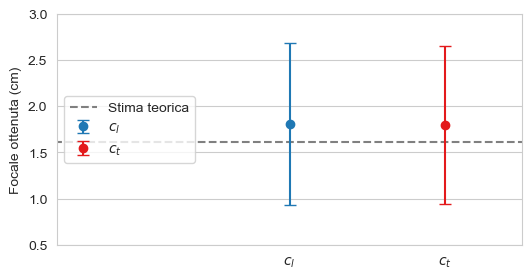

In [161]:
plot_cs(c, [c_l, c_t], [c_l_Dlt, c_t_Dlt], [r'$c_l$', r'$c_t$'])